In [1]:
import pandas as pd
import numpy as np
import os
import itertools
import json
from exp.train import train_model
from exp.features import load_cv_results

from sklearn.metrics import mean_absolute_error

import seaborn as sns

save_results= "exp1.csv"
score_df = load_cv_results(save_results)
score_df['filename'] = save_results

save_results= "exp2.csv"
tmp = load_cv_results(save_results)
tmp['filename'] = save_results
score_df = score_df.append(tmp)

save_results= "exp3.csv"
tmp = load_cv_results(save_results)
tmp['filename'] = save_results
score_df = score_df.append(tmp)
score_df["feature_set"] = "standard_scaled"

save_results= "exp4_1.csv"
score_df_ = load_cv_results(save_results)
score_df_['filename'] = save_results
score_df_ = score_df_.rename(index=str, columns={"cv_score_n_folds_10_shuffle_True_rs_41": "score"})
score_df = score_df.append(score_df_)

save_results= "exp5.csv"
score_df_ = load_cv_results(save_results)
score_df_['filename'] = save_results
score_df_ = score_df_.rename(index=str, columns={"cv_score_n_folds_10_shuffle_True_rs_41": "score"})
score_df = score_df.append(score_df_)

save_results= "exp6.csv"
score_df_ = load_cv_results(save_results)
score_df_['filename'] = save_results
score_df_ = score_df_.rename(index=str, columns={"cv_score_n_folds_10_shuffle_True_rs_41": "score"})
score_df = score_df.append(score_df_)
score_df = score_df.sort_values(by="score", axis=0)

score_df.reset_index(inplace=True)

In [2]:
score_df['model_id'] = score_df['index'].astype(str)
score_df['model_id'] = score_df[['alg','filename','model_id']].apply(lambda x: '_'.join(x), axis=1)

In [3]:
score_df.sort_values(by='score')

,index,alg,feature_set,filename,mad,params_json,score,model_id
0,53,lgb,standard_scaled_pc_0.05,exp5.csv,4.149968e-02,"{""bagging_fraction"": 0.8, ""bagging_freq"": 5, ""...",2.020700e+00,lgb_exp5.csv_53
1,18,lgb,standard_scaled_pc_0.05,exp5.csv,4.704367e-02,"{""bagging_fraction"": 1.0, ""bagging_freq"": 10, ...",2.026146e+00,lgb_exp5.csv_18
2,80,lgb,standard_scaled_pc_0.01,exp5.csv,4.042158e-02,"{""bagging_fraction"": 0.5, ""bagging_freq"": 5, ""...",2.028170e+00,lgb_exp5.csv_80
3,146,lgb,standard_scaled,exp5.csv,3.017709e-02,"{""bagging_fraction"": 0.8, ""bagging_freq"": 5, ""...",2.028190e+00,lgb_exp5.csv_146
4,78,lgb,standard_scaled,exp5.csv,4.072171e-02,"{""bagging_fraction"": 0.8, ""bagging_freq"": 2, ""...",2.028877e+00,lgb_exp5.csv_78
5,66,lgb,standard_scaled_pc_0.01,exp5.csv,3.879124e-02,"{""bagging_fraction"": 0.5, ""bagging_freq"": 0, ""...",2.029171e+00,lgb_exp5.csv_66
6,79,lgb,standard_scaled_pc_0.05,exp5.csv,4.193227e-02,"{""bagging_fraction"": 0.5, ""bagging_freq"": 5, ""...",2.029245e+00,lgb_exp5.csv_79
7,61,lgb,standard_scaled_pc_0.05,exp5.csv,2.623453e-02,"{""bagging_fraction"": 0.8, ""bagging_freq"": 5, ""...",2.029393e+00,lgb_exp5.csv_61
8,37,lgb,standard_scaled_pc_0.01,exp4_1.csv,3.779625e-02,"{""bagging_fraction"": 0.8, ""bagging_freq"": 10, ...",2.029917e+00,lgb_exp4_1.csv_37
9,11,lgb,standard_scaled_pc_0.01,exp4_1.csv,3.652524e-02,"{""bagging_fraction"": 1.0, ""bagging_freq"": 5, ""...",2.029939e+00,lgb_exp4_1.csv_11


In [4]:
RANDOM_SEED = 41
alg_types = ['lgb','rfreg','cat','svr','xgb']

In [5]:
alg_idxes = score_df.groupby('alg')['score'].idxmin().loc[alg_types].values

In [6]:
top_alg = score_df.loc[alg_idxes]
# top_alg.to_csv('top_5_alg.csv')

top_alg

,index,alg,feature_set,filename,mad,params_json,score,model_id
0,53,lgb,standard_scaled_pc_0.05,exp5.csv,0.041500,"{""bagging_fraction"": 0.8, ""bagging_freq"": 5, ""...",2.020700,lgb_exp5.csv_53
52,168,rfreg,standard_scaled,exp2.csv,0.101385,"{""criterion"": ""mae"", ""max_depth"": 5, ""n_estima...",2.036773,rfreg_exp2.csv_168
79,80,cat,standard_scaled,exp3.csv,0.112363,"{""early_stopping"": {""test_size"": 0.1}, ""iterat...",2.044315,cat_exp3.csv_80
132,1,svr,standard_scaled,exp2.csv,0.079078,"{""C"": 10.0, ""gamma"": 0.001, ""kernel"": ""rbf"", ""...",2.056577,svr_exp2.csv_1
150,57,xgb,standard_scaled,exp3.csv,0.035244,"{""early_stopping"": {""early_stopping_rounds"": 2...",2.061103,xgb_exp3.csv_57


In [7]:
train_list = []
for _,row in top_alg.iterrows():
    model_dict = {}
    model_dict['alg'] = row['alg']
    model_dict['fs'] = row['feature_set']
    model_dict['params'] = json.loads(row['params_json'])
    model_dict['rs'] = RANDOM_SEED
    train_list.append(model_dict)

In [9]:
oof_preds = {}
for test_train in train_list:
    _,_, oof = train_model(**test_train)
    oof_preds[test_train['alg']] = oof

Fold 0 started at Mon May 27 18:35:17 2019
Training until validation scores don't improve for 400 rounds.
Early stopping, best iteration is:
[270]	valid_0's l1: 2.06393
Fold 0. MAE: 2.0567.

Fold 1 started at Mon May 27 18:35:17 2019
Training until validation scores don't improve for 400 rounds.
Early stopping, best iteration is:
[555]	valid_0's l1: 2.12796
Fold 1. MAE: 2.0353.

Fold 2 started at Mon May 27 18:35:18 2019
Training until validation scores don't improve for 400 rounds.
Early stopping, best iteration is:
[956]	valid_0's l1: 2.05791
Fold 2. MAE: 2.0111.

Fold 3 started at Mon May 27 18:35:20 2019
Training until validation scores don't improve for 400 rounds.
Early stopping, best iteration is:
[799]	valid_0's l1: 2.14891
Fold 3. MAE: 2.0356.

Fold 4 started at Mon May 27 18:35:21 2019
Training until validation scores don't improve for 400 rounds.
Early stopping, best iteration is:
[348]	valid_0's l1: 2.00224
Fold 4. MAE: 1.8779.

Fold 5 started at Mon May 27 18:35:22 2019
Tr

In [12]:
oof_df = pd.DataFrame(oof_preds)

Text(0.5, 1.0, 'Pairwise Correlation of Predictions')

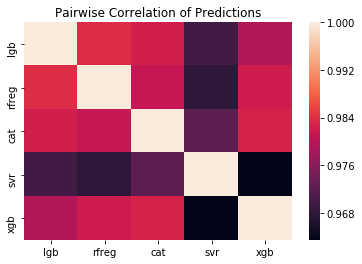

In [69]:
ax = sns.heatmap(oof_df.corr())
ax.set_title('Pairwise Correlation of Predictions')

In [91]:
oof_df.to_csv('../kaggle_files/cv_results/oof_df.csv')

In [98]:
# After saving the unique model names to disk, simplify column names
oof_df.columns = [col.split('_')[0] for col in oof_df.columns]

In [14]:
ttf = pd.read_csv('../kaggle_files/features/train/ttf.csv', index_col=0)

def simple_average(oof_df):
    return mean_absolute_error(ttf, np.mean(oof_df.T))

In [101]:
model_types = oof_df.columns.values

all_combinations = []

model_perms = itertools.combinations(model_types,4)

for perm in model_perms:
    all_combinations.append([perm, simple_average( oof_df[list(perm)])])

model_perms = itertools.combinations(model_types,3)

for perm in model_perms:
    all_combinations.append([perm, simple_average( oof_df[list(perm)])])

model_perms = itertools.combinations(model_types,2)

for perm in model_perms:
    all_combinations.append([perm, simple_average( oof_df[list(perm)])])

In [112]:
single_models = pd.DataFrame([(col,mean_absolute_error(ttf,oof_df[col])) for col in oof_df], columns=['model','MAE'])
single_models

,model,MAE
0,lgb,2.023199
1,rfreg,2.038604
2,cat,2.043739
3,svr,2.050739
4,xgb,2.071437


In [109]:
model_combo_df = pd.DataFrame(all_combinations, columns=['models','averaged_MAE'])
model_combo_df.sort_values(by='averaged_MAE')

,models,averaged_MAE
6,"(lgb, rfreg, svr)",2.021556
15,"(lgb, rfreg)",2.022182
0,"(lgb, rfreg, cat, svr)",2.022276
5,"(lgb, rfreg, cat)",2.022768
8,"(lgb, cat, svr)",2.023699
16,"(lgb, cat)",2.023949
17,"(lgb, svr)",2.024213
11,"(rfreg, cat, svr)",2.027887
2,"(lgb, rfreg, svr, xgb)",2.028056
3,"(lgb, cat, svr, xgb)",2.028717
